In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import chi2
from scipy.stats import pearsonr

In [2]:
names = np.array(['X' + str(i+1) for i in range(86)]) # Hace una lista de nombres de las variables que van desde X1 hasta X86
data = pd.read_csv('../data/ticdata2000.txt', delimiter = "\t",header=None, names=names) # Le pone esos nombre en el header al data frame

X = data.iloc[:,0:85]  # Se seleccionan todas las variables a excepción de la variable respuesta que es la última
y = data.iloc[:, 85] # Se seleccion unicamente la variable respuesta

X_eval = pd.read_csv('../data/ticeval2000.txt', delimiter = "\t",header=None, names=names[:-1]) # Cargamos los datos de evaluación y le pusimos lo nombres al header
y_eval = pd.read_csv('../data/tictgts2000.txt', delimiter = "\t",header=None, names=['X86']) # Cargamos la respuesta de los datos de evaluación 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=1) # Se dividió los datos originales en entrenamiento y prueba

# Zip variables (categoric)

In [3]:
zip_vars = np.array(range(43)) # Tomar las variables categóricas, que son las primeras 44 variables de los datos

<AxesSubplot:title={'center':'Matriz de correlación de las variables categoricas'}>

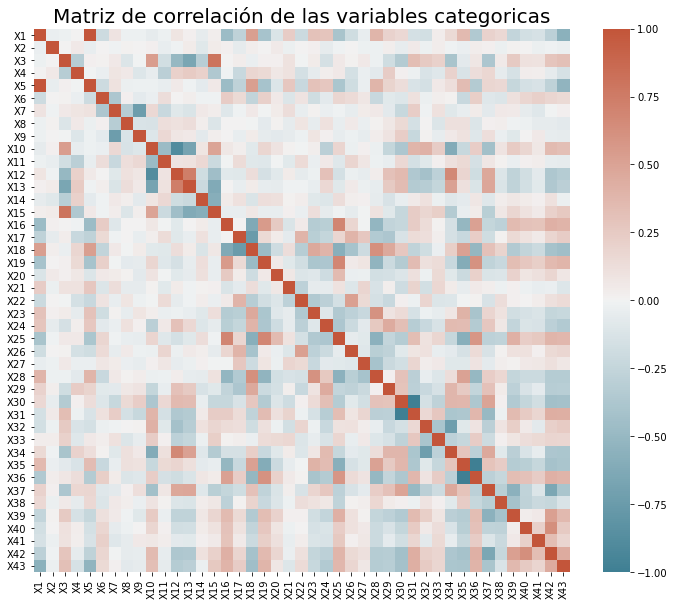

In [4]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Matriz de correlación de las variables categoricas', fontsize=20)
corr = X_train.iloc[:,0:43].corr()
cmap = sns.diverging_palette(220, 20, as_cmap=True)
# plot the heatmap
sns.heatmap(corr,
            cmap=cmap,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            vmin=-1, vmax=1, 
            ax=ax)

## Test chi cuadrada

In [5]:
chi_test = chi2(X_train.iloc[:,0:43], y_train) # Hacemos chi cuadrada a las variables categóricas
sig_zip_vars = zip_vars[chi_test[1] < .005] # Vemos cuales son menor a 0.005

# Non-independent variables (from target)
print(names[sig_zip_vars]) # El nombre de las variables no independientes

['X1' 'X5' 'X10' 'X11' 'X12' 'X13' 'X16' 'X17' 'X18' 'X19' 'X21' 'X22'
 'X23' 'X24' 'X25' 'X28' 'X29' 'X30' 'X31' 'X32' 'X34' 'X35' 'X36' 'X37'
 'X39' 'X40' 'X42' 'X43']


## Histograms (Bought policies)

In [6]:
def plot_freq(var, target, ax, xlab): # Gráfica estandarizada de la variable X# contra su proporción (PONERLE TÍTULO A LA GRÁFICA)
    tab = pd.crosstab(var, target)
    y = tab.iloc[:,1]/tab.sum(axis=1)
    #y = tab.iloc[:,1]
    pal = sns.color_palette("ch:s=.25,rot=-.25", len(y))
    rank = y.argsort().argsort()
    sns.barplot(y=y, x=tab.index, ax=ax, palette=np.array(pal)[rank])
    ax.set_xlabel(xlab)
    ax.set_ylabel('Proporción')

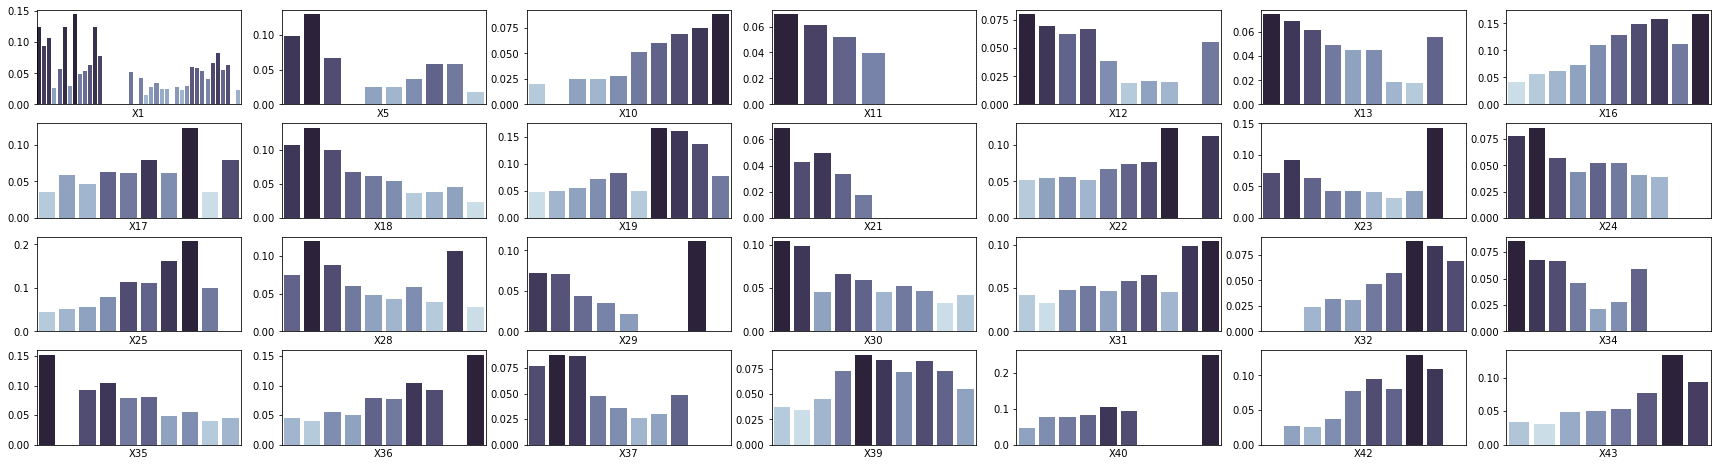

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=7, figsize=(30,8))
axes = axes.ravel()
for i in range(len(names[sig_zip_vars])):
    var = names[sig_zip_vars][i]
    plot_freq(X_train.loc[:,var], y_train, axes[i], var)
    axes[i].tick_params(axis='x', bottom=False, labelbottom=False)
    axes[i].set_ylabel('')

## Reduce ranges

In [8]:
vars_to_change = [9,18,22,23,29,31,35,36]
new_vars = np.array(['X'+str(i+1)+'_2' for i in vars_to_change])
names = np.concatenate((names[:-1], new_vars))
class_reducer = {0:1, 1:1, 2:2, 3:2, 4:3, 5:3, 6:4, 7:4, 8:5, 9:5}

In [17]:
# Add new columns to X_train
X_train = pd.concat([X_train, X_train.iloc[:,vars_to_change]], axis=1) # Se copian las columnas que vamos a cambiar al final del dataframe
X_train.columns = names

# Reduce 10 classes to 5
for i in range(len(vars_to_change)):
    X_train.iloc[:,i+85] = X_train.iloc[:,i+85].replace(class_reducer)

In [18]:
# Same for X_test
X_test = pd.concat([X_test, X_test.iloc[:,vars_to_change]], axis=1) # Copy columns to mutate
X_test.columns = names

# Reduce 10 classes to 5
for i in range(len(vars_to_change)):
    X_test.iloc[:,i+85] = X_test.iloc[:,i+85].replace(class_reducer)

In [19]:
# Same for X_eval
X_eval = pd.concat([X_eval, X_eval.iloc[:,vars_to_change]], axis=1) # Copy columns to mutate
X_eval.columns = names

# Reduce 10 classes to 5
for i in range(len(vars_to_change)):
    X_eval.iloc[:,i+85] = X_eval.iloc[:,i+85].replace(class_reducer)

In [20]:
# Useful variables after visual inspection
useful_zip_vars = [4, 17, 85, 86, 88, 89, 90, 91, 92]

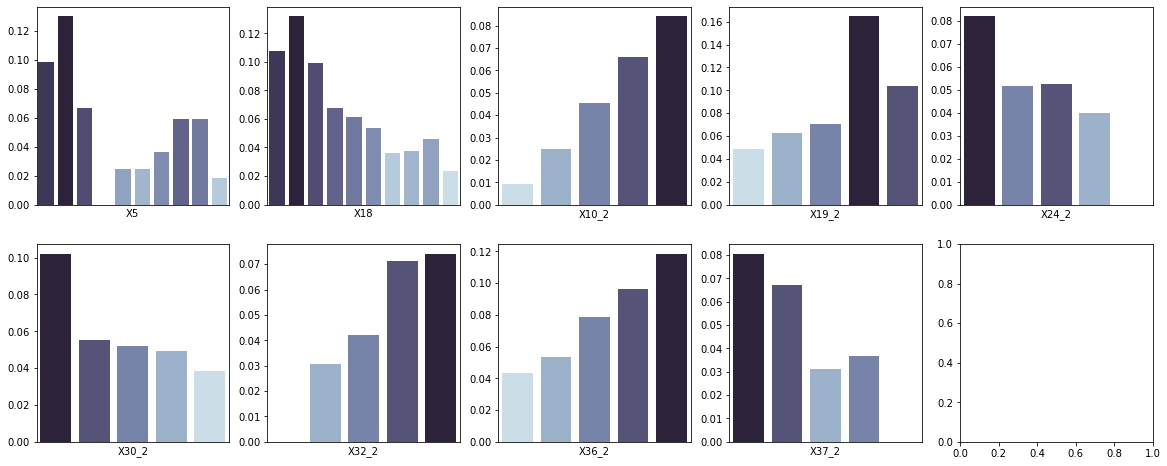

In [21]:
# Reduced range variables
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,8))
axes = axes.ravel()
for i in range(len(names[useful_zip_vars])):
    var = names[useful_zip_vars][i]
    plot_freq(X_train.loc[:,var], y_train, axes[i], var)
    axes[i].tick_params(axis='x', bottom=False, labelbottom=False)
    axes[i].set_ylabel('')

# Ordinal and numeric variables

<AxesSubplot:title={'center':'Matriz de correlación de las variables numéricas'}>

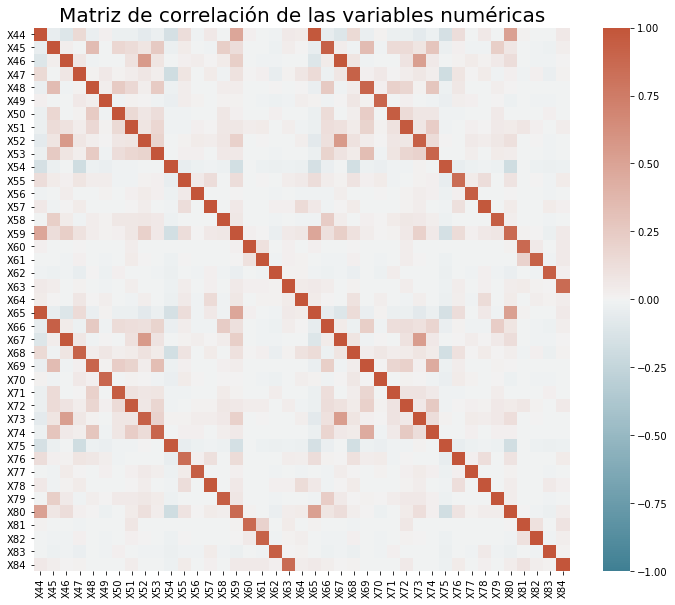

In [23]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Matriz de correlación de las variables numéricas', fontsize=20)
corr = X_train.iloc[:,43:84].corr()
cmap = sns.diverging_palette(220, 20, as_cmap=True)
# plot the heatmap
sns.heatmap(corr,
            cmap=cmap,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            vmin=-1, vmax=1, 
            ax=ax)

The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

In [27]:
# find variables with significant correlation with target
pvalue= []
for i in range(43,85):
    pvalue.append(pearsonr(X_train.iloc[:,i],y_train)[1])
# Significant numeric variables
sig_num_vars = names[43:85][np.array(pvalue)<.01]
useful_num_vars = [43, 46, 53, 58, 60, 63] # removed corrrelated vars